In [6]:
import numpy as np  # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import seaborn as sns  # For statistical data visualization

import cv2  # For image processing and computer vision tasks
import random  # For generating random numbers
import os  # For interacting with the operating system

import keras  # High-level neural networks API
import tensorflow as tf  # Machine learning and deep learning framework
from tqdm import tqdm  # For displaying progress bars
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding labels into numerical format
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks for optimizing training process
from tensorflow.keras.applications import *  # Importing pre-trained models for transfer learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img  # For image data augmentation and loading images
from tensorflow.keras.models import Sequential  # For creating sequential model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, BatchNormalization  # Different types of neural network layers
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluating model performance



In [7]:
file_path='/kaggle/input/fer2013/train'   
        
image_paths = []  # List to store image file paths
category_labels = []  # List to store category labels of images

for category in os.listdir(file_path):
    category_path = os.path.join(file_path, category)  # Full path to the category folder
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a directory

    # Iterate through each image file in the category folder
    for image_file in os.listdir(category_path):
        full_image_path = os.path.join(category_path, image_file)  # Full path to the image file
        image_paths.append(full_image_path)  # Add image path to list
        category_labels.append(category)  # Add category label to list


In [8]:
data = pd.DataFrame({'image':image_paths,'label':category_labels})
data.head()

,image,label
0,/kaggle/input/fer2013/train/surprise/Training_...,surprise
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/surprise/Training_...,surprise
3,/kaggle/input/fer2013/train/surprise/Training_...,surprise
4,/kaggle/input/fer2013/train/surprise/Training_...,surprise


In [9]:
class_names = data['label'].unique().tolist()
class_names

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [10]:
data.describe()

,image,label
count,28709,28709
unique,28709,7
top,/kaggle/input/fer2013/train/happy/Training_956...,happy
freq,1,7215


In [11]:
df_label=data['label'].value_counts().to_frame().reset_index()
df_label

,label,count
0,happy,7215
1,neutral,4965
2,sad,4830
3,fear,4097
4,angry,3995
5,surprise,3171
6,disgust,436


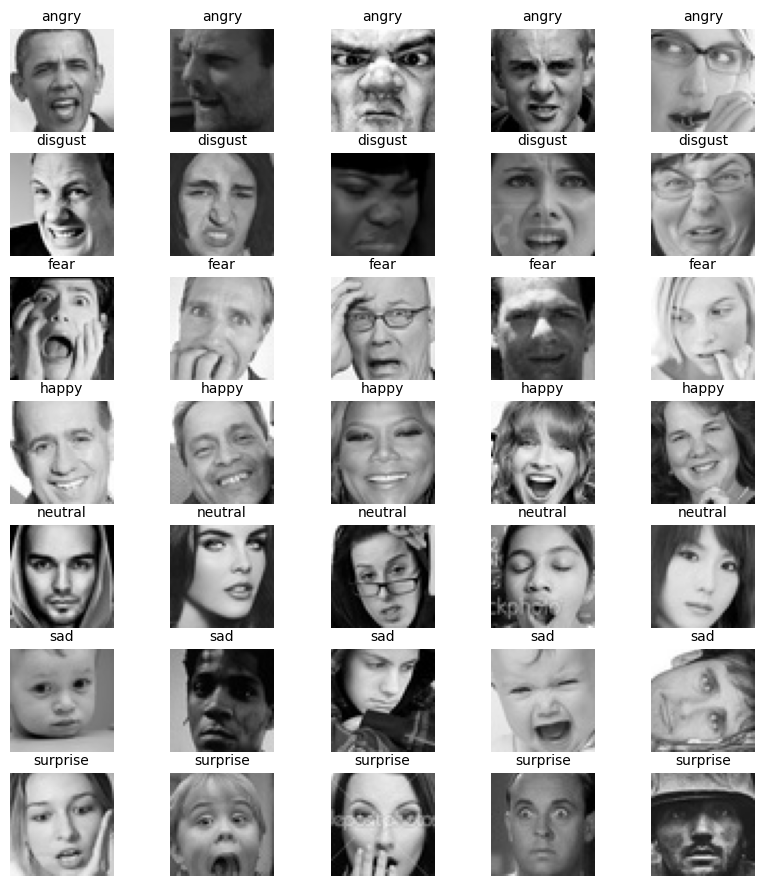

In [12]:
grouped_data=data.groupby('label')
plt.figure(figsize=(10,11))

# Initialize a subplot index
subplot_idx = 1

# Loop through each group (label)
for label, group in grouped_data:
    # Get 5 images from each group
    sample_images = group.sample(n=5, random_state=1)  # Change random_state for different samples

    # Loop through the sample images
    for _, row in sample_images.iterrows():
        img = cv2.imread(row['image'])  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(len(grouped_data), 5, subplot_idx)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label, fontsize=10)
        subplot_idx += 1

plt.show()

In [13]:
x = data['image']
y = data['label']
x_train,x_test1,y_train,y_test1 = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=145)
x_val, x_test, y_val, y_test  = train_test_split(x_test1,y_test1,test_size=0.5,shuffle=True,random_state=145)

In [14]:
print(f'The shape of x_train:{x_train.shape}')
print(f'The shape of x_test:{x_test.shape}')
print(f'The shape of x_val:{x_val.shape}')
print(f'The shape of y_train:{y_train.shape}')
print(f'The shape of y_test:{y_test.shape}')
print(f'The shape of y_val:{y_val.shape}')

The shape of x_train:(22967,)
The shape of x_test:(2871,)
The shape of x_val:(2871,)
The shape of y_train:(22967,)
The shape of y_test:(2871,)
The shape of y_val:(2871,)


In [15]:
train_df = pd.DataFrame({'image':x_train,'label':y_train})
test_df = pd.DataFrame({'image':x_test,'label':y_test})
validation_df = pd.DataFrame({'image':x_val,'label':y_val})

print(f'The shape of train_df:{train_df.shape}')
print(f'The shape of test_df:{test_df.shape}')
print(f'The shape of validation_df:{validation_df.shape}')

The shape of train_df:(22967, 2)
The shape of test_df:(2871, 2)
The shape of validation_df:(2871, 2)


In [16]:
label = LabelEncoder()

y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)
y_val = label.transform(y_val)

In [17]:
Image_size = 120
input_shape = (120,120,3)
Batch_size=32

In [18]:
img_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.15,  
    zoom_range=0.15  
)

In [19]:
train_gen = img_gen.flow_from_dataframe(train_df,x_col='image',y_col='label',
                                        target_size=(Image_size,Image_size),
                                       batch_size=Batch_size,shuffle=True,class_mode='categorical') 
                                                                                                    
test_gen = img_gen.flow_from_dataframe(test_df,x_col='image',y_col='label',                         
                                        target_size=(Image_size,Image_size),                        
                                       batch_size=Batch_size,shuffle=False,class_mode='categorical')

val_gen = img_gen.flow_from_dataframe(validation_df,x_col='image',y_col='label',
                                        target_size=(Image_size,Image_size),                         
                                       batch_size=Batch_size,shuffle=True,class_mode='categorical')   

Found 22967 validated image filenames belonging to 7 classes.
Found 2871 validated image filenames belonging to 7 classes.
Found 2871 validated image filenames belonging to 7 classes.


In [20]:
base_model =tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(120,120,3),
    weights='imagenet'
)
base_model.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [21]:
model_VGG16 =tf.keras.applications.VGG16(
    include_top=False,
    input_shape=(120,120,3),
    weights='imagenet'
)
model_VGG16.trainable = False
input_layer = tf.keras.layers.Input(shape=(120,120,3))
x = model_VGG16(input_layer,training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(2024,activation='relu')(x)
x = tf.keras.layers.Dropout(0.15)(x)
output = tf.keras.layers.Dense(7,activation='softmax')(x)

model_VGG16 = tf.keras.Model(inputs=[input_layer],outputs=[output])
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 2024)              9328616   
                                                                 
 dropout (Dropout)           (None, 2024)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 14175     
                                                                 
Total params: 24057479 (91.77 MB)
Trainable params: 9342791 (

In [22]:
earlystop= EarlyStopping(patience=20)
reduce_lr= ReduceLROnPlateau(monitor="val_accuracy",
                            patience=20,
                            factor=0.5, min_lr=0.00001)
callbacks= [earlystop, reduce_lr]
model_VGG16.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history_modelVGG16 = model_VGG16.fit_generator(train_gen,epochs=80,validation_data=val_gen,callbacks=callbacks)

/tmp/ipykernel_35/175084872.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_modelVGG16 = model_VGG16.fit_generator(train_gen,epochs=80,validation_data=val_gen,callbacks=callbacks)


Epoch 1/80


I0000 00:00:1706808144.450493     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


718/718 [==============================] - 209s 282ms/step - loss: 1.6565 - accuracy: 0.3653 - val_loss: 1.5449 - val_accuracy: 0.3877 - lr: 0.0010
Epoch 2/80
718/718 [==============================] - 108s 150ms/step - loss: 1.5417 - accuracy: 0.3997 - val_loss: 1.5506 - val_accuracy: 0.4006 - lr: 0.0010
Epoch 3/80
718/718 [==============================] - 108s 151ms/step - loss: 1.5164 - accuracy: 0.4092 - val_loss: 1.5014 - val_accuracy: 0.4173 - lr: 0.0010
Epoch 4/80
718/718 [==============================] - 109s 151ms/step - loss: 1.4978 - accuracy: 0.4182 - val_loss: 1.4679 - val_accuracy: 0.4263 - lr: 0.0010
Epoch 5/80
718/718 [==============================] - 109s 151ms/step - loss: 1.4834 - accuracy: 0.4245 - val_loss: 1.4821 - val_accuracy: 0.4239 - lr: 0.0010
Epoch 6/80
718/718 [==============================] - 108s 150ms/step - loss: 1.4715 - accuracy: 0.4330 - val_loss: 1.4676 - val_accuracy: 0.4476 - lr: 0.0010
Epoch 7/80
718/718 [==============================] - 108

90/90 [==============================] - 12s 131ms/step - loss: 1.3790 - accuracy: 0.4814
Test Accuracy: 0.4813653826713562


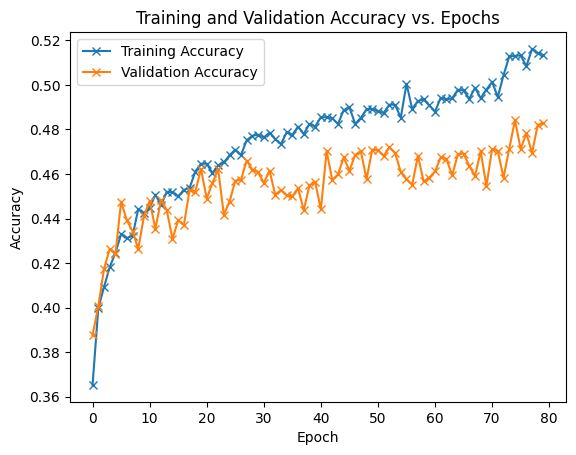

In [33]:
# Assuming your test data is in test_gen
test_loss, test_accuracy = model_VGG16.evaluate(test_gen)
print(f'Test Accuracy: {test_accuracy}')

def plot_accuracies(history):
    train_accuracies = history.history['accuracy']
    val_accuracies = history.history['val_accuracy']
    
    plt.plot(train_accuracies, '-x', label='Training Accuracy')
    plt.plot(val_accuracies, '-x', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy vs. Epochs')
    plt.legend()
    plt.show()

plot_accuracies(history_modelVGG16)

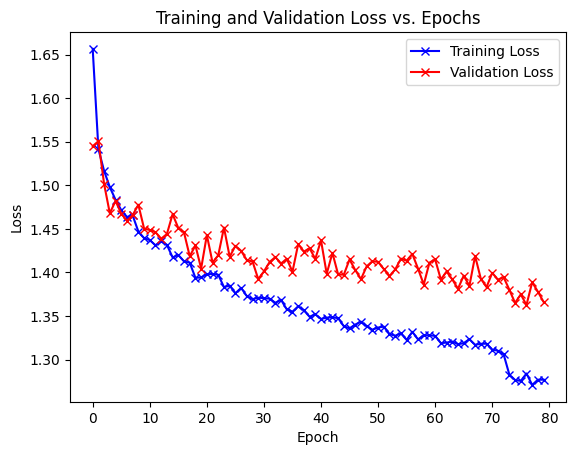

In [34]:
def plot_losses(history):
    train_losses = history.history['loss']
    val_losses = history.history['val_loss']
    
    plt.plot(train_losses, '-bx', label='Training Loss')
    plt.plot(val_losses, '-rx', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss vs. Epochs')
    plt.show()

plot_losses(history_modelVGG16)

In [41]:
model_VGG16.save('model.h5') 

# ****Testing The Model****

In [42]:
file_path='/kaggle/input/fer2013/test'   
        
image_paths = []  # List to store image file paths
category_labels = []  # List to store category labels of images

for category in os.listdir(file_path):
    category_path = os.path.join(file_path, category)  # Full path to the category folder
    if not os.path.isdir(category_path):
        continue  # Skip if it's not a directory

    # Iterate through each image file in the category folder
    for image_file in os.listdir(category_path):
        full_image_path = os.path.join(category_path, image_file)  # Full path to the image file
        image_paths.append(full_image_path)  # Add image path to list
        category_labels.append(category)  # Add category label to list

In [43]:
df = pd.DataFrame({'image':image_paths,'label':category_labels})
df.head()

,image,label
0,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
1,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
2,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise
3,/kaggle/input/fer2013/test/surprise/PublicTest...,surprise
4,/kaggle/input/fer2013/test/surprise/PrivateTes...,surprise


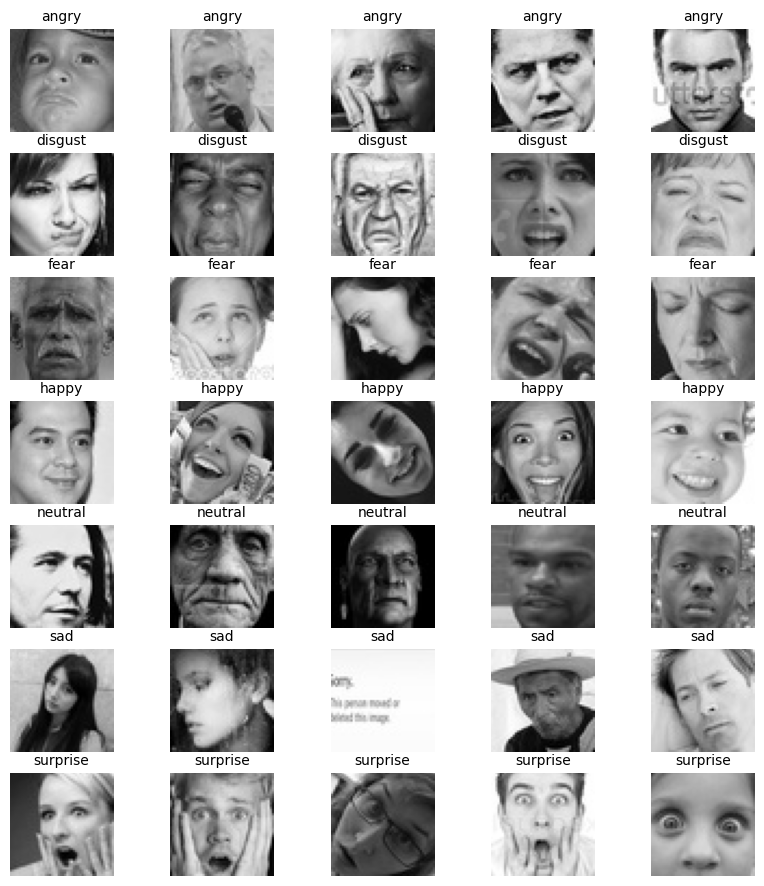

In [57]:
grouped_data=df.groupby('label')
plt.figure(figsize=(10,11))

# Initialize a subplot index
subplot_idx = 1

# Loop through each group (label)
for label, group in grouped_data:
    # Get 5 images from each group
    sample_images = group.sample(n=5, random_state=1)  # Change random_state for different samples

    # Loop through the sample images
    for _, row in sample_images.iterrows():
        img = cv2.imread(row['image'])  # Read the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(len(grouped_data), 5, subplot_idx)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label, fontsize=10)
        subplot_idx += 1

plt.show()

In [51]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(120, 120))  # Resize to your model's input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

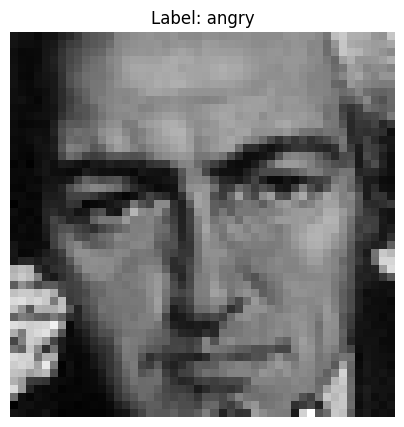

1/1 [==============================] - 0s 144ms/step
Actual Label: angry
Predicted Label: 4


In [60]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.preprocessing import image  # Import the 'image' module from keras.preprocessing

# Load your trained model
model_VGG16 = load_model('model.h5')

# ... (your grouped_data code)

# Select a random image from the grouped data
random_label = np.random.choice(list(grouped_data.groups.keys()))
random_group = grouped_data.get_group(random_label)
random_image = random_group.sample(n=1).iloc[0]

# Display the selected image and label
img_path = random_image['image']
img_label = random_image['label']

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Label: {img_label}", fontsize=12)
plt.axis('off')
plt.show()

# Preprocess the image for prediction (resize to match the model's input size)
img = preprocess_image(img_path)

# Make predictions using your loaded model
prediction = model_VGG16.predict(img)
predicted_label = np.argmax(prediction)

print(f"Actual Label: {img_label}")
print(f"Predicted Label: {predicted_label}")

In [59]:
class_names = df['label'].unique().tolist()
class_names

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']